# **Birliktelik Kuralları**
Birliktelik kuralı, geçmiş verilerin analiz edilerek bu veriler içindeki birliktelik davranışlarının tespiti ile geleceğe yönelik çalışmalar yapılmasını destekleyen bir yaklaşımdır. Birliktelik kurallarının kullanıldığı en tipik örnek Market Sepeti Analizi’dir (Pazar Sepeti Analizi).

# **Market Sepet Analizi**
Bir müşteri süt satın alıyorsa, aynı alışverişte sütün yanında ekmek alma olasılığı nedir? Bu tip bir bilgi ışığında rafları düzenleyen market yöneticileri ürünlerindeki satış oranını arttırabilirler. Örneğin bir marketin müşterilerinin süt ile birlikte ekmek satın alma oranı yüksekse, market yöneticileri süt ile ekmek raflarını yan yana koyarak ekmek satışlarını arttırabilirler. Örneğin; bir A ürününü satın alan müşteriler aynı zamanda B ürününü da satın alıyorlarsa, bu durum Birliktelik Kuralı ile gösterilir.

# **Apriori Algoritması**
Apriori algoritması, Agrawal ve Srikant tarafından 1994 yılında geliştirilmiştir. Veri Madenciliğinde, birliktelik kuralı çıkarım algoritmaları içerisinde en fazla bilinen ve kullanılan algoritmadır.
Apriori algoritması, veri madenciliği ve veri analitiği alanlarında kullanılan bir sıklık tabanlı (frequency-based) örüntü madenciliği algoritmasıdır. Bu algoritma, veri kümesindeki sıklıkla ortaya çıkan örüntüleri bulmak için kullanılır, özellikle pazar sepeti analizi gibi uygulamalarda popülerdir.

Apriori algoritması, aşağıdaki temel kavramlara dayanır:

**Destek (Support):** Bir örüntünün veri kümesinde kaç kez görüldüğünü ifade eden bir ölçüdür. Destek, belirli bir örüntünün ne kadar yaygın olduğunu gösterir.

**Güven (Confidence):** İki örüntü arasındaki ilişkinin gücünü ifade eder. Örneğin, bir öğe kümesinin birlikte görüldüğü durumlar içinde, bir öğenin diğerini ne sıklıkta içerdiğini belirten bir ölçüdür.

**Güvenilirlik (Confidence):** Destek ve güven arasındaki dengeyi sağlayan bir faktördür. Güvenilirlik, belirli bir kuralın gerçekten anlamlı ve güvenilir olup olmadığını değerlendirmeye yardımcı olur.

# **Kütüphaneleri import edelim**

In [2]:
import pandas as pd #veri işlemesi ve analizi kütüphanesi
import numpy as np #Büyük, çok boyutlu dizileri ve matrisleri destekleyen diziler üzerinde çalışacak üst düzey matematik işlevleri ekleyen kütüphane
from IPython.display import Image #Python ortamında resim dosyalarını göstermek için kullanılır.
import matplotlib.pyplot as plt #Bilimsel grafikler oluşturmak için yaygın olarak kullanılan bir araçtır.

# **Veri setini okuyalım**

In [5]:
hamveri = pd.read_csv("retail_dataset.csv",sep=",") #Bu Python kodu, pandas kütüphanesini kullanarak bir CSV dosyasından veri okuma işlemi gerçekleştirir.

In [4]:
hamveri.shape #pandas veri setinin'inin boyutlarını (satır ve sütun sayısı) döndürür.

(315, 7)

# **Veri setini kontrol amaçlı ilk 5 satırını yazdıralım**

In [6]:
hamveri.head() #veri setinin ilk 5 satırını yazdırır

,0,1,2,3,4,5,6
0,Ekmek,Kola,Yumurta,Kiyma,Peynir,Kalem,Bebek Bezi
1,Ekmek,Peynir,Kiyma,Bebek Bezi,Kola,Sut,Kalem
2,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
3,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
4,Kiyma,Kalem,Kola,NaN,NaN,NaN,NaN


# **Ürünlerin isimlerini getirir**

In [7]:
column_names = (hamveri['0'].unique()) #sütunlardaki benzersiz değerleri (unique values) döndürür.
column_names #ürünlerin isimlerini getirir

array(['Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna', 'Kalem',
       'Bebek Bezi', 'Sut'], dtype=object)

# **Veri Seti'nin her sütunundaki eksik (NaN) değerlerin sayısını sorgulayalım**

In [9]:
hamveri.isna().sum() #veri setindeki eksik değerlerin sütun bazında toplam sayısını sağlar.

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [10]:
hamveri["0"].unique() #ürünlerin isimlerini getirir

array(['Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna', 'Kalem',
       'Bebek Bezi', 'Sut'], dtype=object)

# **Aşağıdaki kod parçası, her satırın sütunlarını baz alarak, her bir sütunun o satırda bulunup bulunmadığını gösteren bir etiketleme işlemi gerçekleştirir. Bu tür bir işlem, özellikle kategorik verilerle çalışırken kullanılabilir ve özellikle sütunlar arasındaki ilişkileri anlamak için yardımcı olur.**

In [11]:
encoded_vals = [] #Boş bir liste oluşturulur. Bu liste, her satır için oluşturulan etiketleme sözlüklerini içerecek.
for index, row in hamveri.iterrows(): #hamveri veri seti üzerinde bir döngü başlatılır. Bu döngü, veri seti'nin her satırını temsil eder.
    labels = {} #Her satır için boş bir etiketleme sözlüğü oluşturulur. Bu sözlük, sütun isimleriyle ilişkilendirilmiş değerlere sahip olacak.
    uncommons = list(set(column_names) - set(row)) #uncommons, o satırdaki benzersiz sütun isimleri ile column_names içindeki sütun isimleri arasındaki farkı bulur. Yani, bu satırda bulunmayan sütun isimlerini belirler.
    commons = list(set(column_names).intersection(row)) #commons, o satırdaki benzersiz sütun isimleri ile column_names içindeki sütun isimleri arasındaki kesişimi bulur. Yani, bu satırda bulunan sütun isimlerini belirler.
    for uc in uncommons: #Her bir eksik sütun ismi için, etiketleme sözlüğüne bu sütun ismini ve karşılık gelen değeri (0) ekler. Yani, bu sütunlar bu satırda bulunmuyorsa, değer 0 olarak atanır.
        labels[uc] = 0
    for com in commons: # Her bir ortak sütun ismi için, etiketleme sözlüğüne bu sütun ismini ve karşılık gelen değeri (1) ekler. Yani, bu sütunlar bu satırda bulunuyorsa, değer 1 olarak atanır.
        labels[com] = 1
    encoded_vals.append(labels) #Her satırın etiketleme sözlüğü, encoded_vals listesine eklenir. Bu, her bir satır için oluşturulan etiketleme sözlüklerini içeren bir liste oluşturur.

# **Aşağıdaki işlem, kategorik sütunlardaki her bir farklı değeri ayrı bir sütun olarak temsil eder ve bu sütunlara 0 veya 1 değerleri atanır.**

In [13]:
ohe_hamveri = pd.DataFrame(encoded_vals) #encoded_vals adlı liste içinde bulunan her bir etiketleme sözlüğünü içeren bir DataFrame oluşturulur. Bu DataFrame, one-hot encoding işlemi uygulanmış veriyi içerir. Her bir sütun, bir kategorik sütunun benzersiz değerlerini temsil eder.
ohe_hamveri #Oluşturulan DataFrame, ohe_hamveri adlı yeni bir DataFrame'e atanır.

,Sut,Makarna,Kiyma,Ekmek,Yumurta,Kola,Bebek Bezi,Peynir,Kalem
0,0,0,1,1,1,1,1,1,1
1,1,0,1,1,0,1,1,1,1
2,1,0,1,0,1,1,0,1,0
3,1,0,1,0,1,1,0,1,0
4,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,1,0,0,1,0
311,1,0,1,0,0,0,0,0,1
312,0,0,1,1,1,1,1,1,1
313,0,0,1,0,0,0,0,1,0


In [14]:
# Müşterilerin makarna ürününü kaç kere satın aldığı
ohe_hamveri["Makarna"][ohe_hamveri["Makarna"]>0].sum()

134

In [15]:
# Müşterilerin makarna ürününü kaç kere satın aldığı
ohe_hamveri["Ekmek"][ohe_hamveri["Ekmek"]>0].sum()

159

# **Tüm ürünlerin kaç kere satın alındığı bilgisi**

In [16]:
miktar = ohe_hamveri[column_names][ohe_hamveri[column_names]>0].sum() #bu kodun amacı, one-hot encoding işlemi uygulanan kategorik sütunlarda bulunan toplam 1 sayısını hesaplamaktır.

In [17]:
miktar = pd.DataFrame(miktar,dtype=int)
miktar.columns=["Miktar"]
miktar

,Miktar
Ekmek,159
Peynir,158
Kiyma,150
Yumurta,138
Kola,138
Makarna,134
Kalem,114
Bebek Bezi,128
Sut,158


# **Yukarıdaki verilerin grafik olarak gösterimini bir plot grafiğinde çizdirelim**

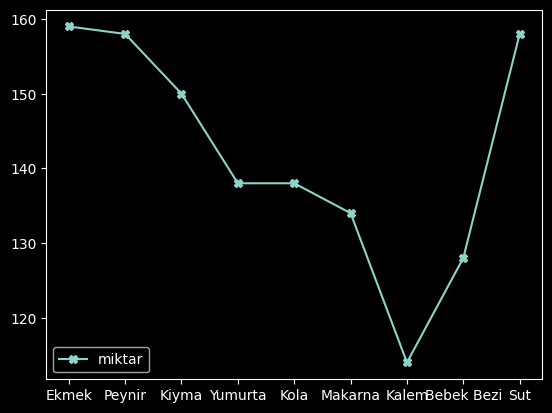

In [20]:
plt.style.use('dark_background')
plt.plot(miktar, label = 'miktar',marker = 'X')
plt.legend()

Birinci Adım Apriori algoritmasının ilk adımı, elimizde bulunan verilerdeki her ürünün frekans değerinin (tekrar sayısının) bulunup, support değerlerinin hesaplanmasıdır. Her ürünün tablomuzda kaç kez bulunduğunu tek tek saydığımızda oluşan frekans ve support tablosu aşağıda gösterilmiştir.

In [21]:
pip install mlxtend

Birliktelik kuralında, öğeler arasındaki birliktelik, destek ve güven kriterleri ile hesaplanır. Destek (Support) kriteri, veride öğeler arasındaki bağıntının ne kadar sık olduğunu belirtir. X ve Y farklı ürünler olmak üzere, X ürünü için destek, tüm alışverişler içinde X ürününün oranıdır. DESTEK(X) = X Sayısı / Toplam Alışveriş Sayısı X ve Y ürünleri için destek, X ve Y’nin bir arada tüm alışverişler içinde bulunma olasılığıdır. DESTEK(X, Y) = (X, Y) Sayısı / Toplam Alışveriş Sayısı

In [ ]:
# Öncelikle minimum destek değerini belirliyoruz.

from mlxtend.frequent_patterns import apriori, association_rules
frekans_degeri = apriori(ohe_hamveri, min_support = 0.2, use_colnames = True, verbose = 1)

min_support=0.2: Bu, Apriori algoritmasının bir kuralı oluşturmadan önce gözlemler içinde minimum destek değerini belirtir. Yani, bir örüntünün en az ne kadar sıklıkta olması gerektiğini belirler. Burada, en az %20 destek değerine sahip örüntüler ele alınır.

In [25]:
frekans_degeri
# Belirlediğimiz destek değerinin üstündeki tüm ürünler ve ürün kombinasyonlarını yazdırıyoruz.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.501587,(Sut)
1,0.425397,(Makarna)
2,0.476190,(Kiyma)
3,0.504762,(Ekmek)
4,0.438095,(Yumurta)
5,0.438095,(Kola)
6,0.406349,(Bebek Bezi)
7,0.501587,(Peynir)
8,0.361905,(Kalem)
9,0.225397,"(Sut, Makarna)"


In [26]:
# Destek değeri 0.45'ten yüksek olanları göster.
frekans_degeri["itemsets"][frekans_degeri["support"]>0.45]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       (Sut)
2     (Kiyma)
3     (Ekmek)
7    (Peynir)
Name: itemsets, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

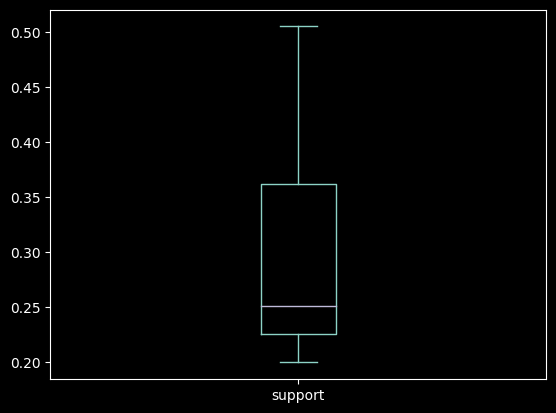

In [27]:
# Tek veya birlikte ürün kombinasyonları ortalama 0.25 destek değerine sahip.
frekans_degeri["support"].plot.box()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


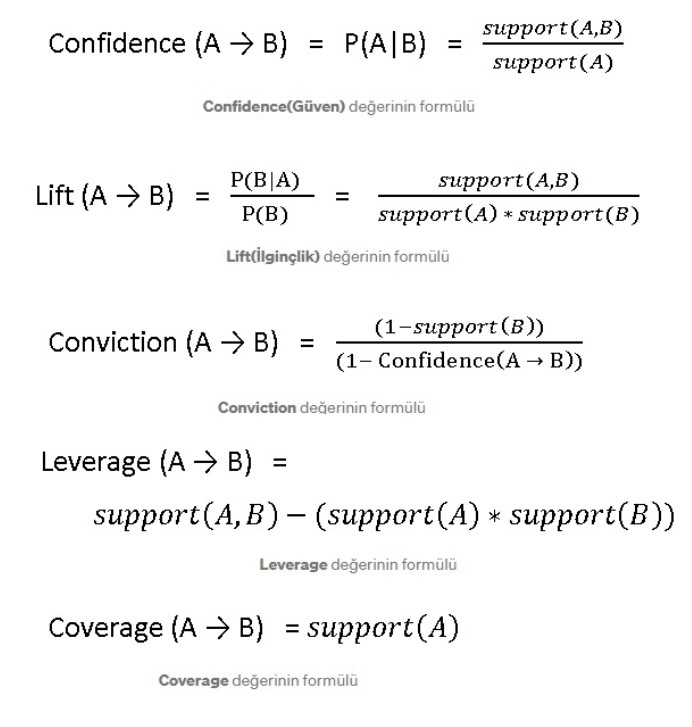

In [35]:
#Ölçüm değerleri formülleri
Image(filename='image.jpg',width=600, height=600)

Bulacağımız değerler aşağıda sıralanmıştır.

- Confidence (Güven)
- Lift (İlginçlik)
- Conviction
- Leverage
- Conviction
-Bu değerler arasından genellikle kullanacağımız iki değer vardır. Confidence (Güven) ve Lift (İlginçlik). Confidence değeri 0 ile 1 arasındadır. Yüksek değer kuralımızın güvenli(doğru olabilecek) olduğunu belirtir.

In [39]:
#Minimum confidence(güven) değerimizi belirliyoruz
solve = association_rules(frekans_degeri, metric = "confidence", min_threshold = 0.6)
solve
#confidence değerlerimiz bizim sistemimizin tahmin değerlerini oluşturuyor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sut),(Peynir),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
1,(Peynir),(Sut),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Makarna),(Ekmek),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
3,(Yumurta),(Kiyma),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
4,(Peynir),(Kiyma),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
5,(Kiyma),(Peynir),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
6,(Yumurta),(Peynir),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
7,(Kola),(Peynir),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
8,"(Sut, Peynir)",(Kiyma),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429,0.410959
9,"(Sut, Kiyma)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816


Örneğin, 13.satırdaki veriyi yorumlarsak (Yumurta, Kiyma) alan müşterilerin (Peynir) alma değeri 0.809524'dir. Bu da yaklaşık olarak %81'e tekabül ediyor.

Bu şekilde biz de marketimizde bulan ürünlerin hangilerinin yanyana koymamız gerektiğini veya kampanya yapılacaksa hangi ürünleri alanların diğer ürünleri alma kısmında avantajlı olabileceğini analiz edebiliriz. Böylelikle marketin satış oranlarını arttırabiliriz.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

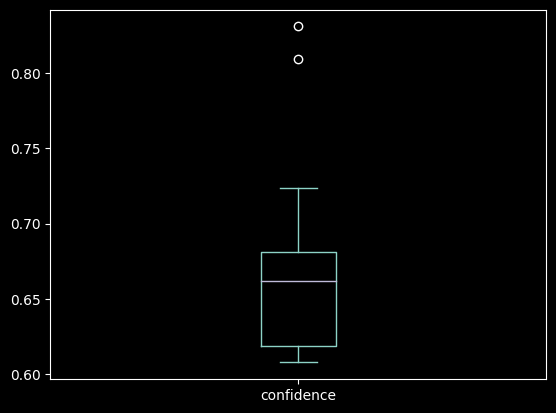

In [40]:
#Tablomuzda oluşan confidence(güven) değerlerinin plot.box grafiğini çizdirelim
solve["confidence"].plot.box()

Uç değer olarak 2 tane değerimiz bariz bir şekilde çıktı. Bu iki değerimiz bizim için avantajlı sayılabilecek değerler.

In [41]:
#Bu 2 değeri listelemek için bir sorgu gerçekleştiriyoruz. Confidence(güven) değeri 0.8'den yukarıda olan yani %80den yukarıda olan değerler.
solve[solve["confidence"]>0.8]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(Sut, Kiyma)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
13,"(Yumurta, Kiyma)",(Peynir),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,0.518717


Çıkan sonuca göre
- (Sut, Kiyma) alan müşterilerin (Peynir)	alma değeri 0.831169'dir. Bu da yaklaşık olarak %83'e takabül etmektedir.
- (Yumurta, Kiyma) alan müşterilerin (Peynir)	alma değeri 0.809524'dir. Bu da yaklaşık olarak %81'e takabül etmektedir.